In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [ ]:
scale_factor = 1000

train_df["median_house_value"] /= 1000
test_df["median_house_value"] /= 1000

In [ ]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model  

def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)
  
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

In [ ]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

In [ ]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.09,32.55,8.0,6533.0,1217.0,4797.0,1177.0,3.9583,144.4
996,-117.10,34.57,6.0,5110.0,1044.0,1938.0,724.0,3.1917,112.8
997,-117.10,34.21,22.0,4397.0,931.0,1145.0,445.0,4.5268,108.4
998,-117.10,34.03,24.0,4144.0,826.0,2127.0,772.0,2.5172,96.0


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 4ms/step - loss: 45692.8008 - root_mean_squared_error: 213.7587 - val_loss: 35633.4648 - val_root_mean_squared_error: 188.7683
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 26952.1270 - root_mean_squared_error: 164.1710 - val_loss: 19930.7676 - val_root_mean_squared_error: 141.1764
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 14563.6836 - root_mean_squared_error: 120.6801 - val_loss: 10470.4189 - val_root_mean_squared_error: 102.3251
Epoch 4/30
136/136 [==============================] - 0s 3ms/step - loss: 8371.0137 - root_mean_squared_error: 91.4932 - val_loss: 7014.8281 - val_root_mean_squared_error: 83.7546
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 7059.7939 - root_mean_squared_error: 84.0226 - val_loss: 6880.1416 - val_root_mean_squared_error: 82.9466
Epoch 6/30
136/136 [==============================] - 1s 4ms/step - loss: 7048.4658 - root_mean_squ

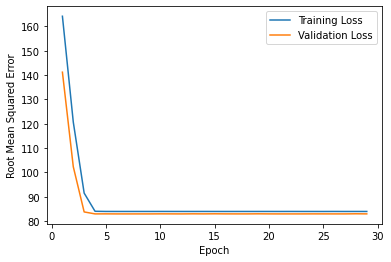

In [ ]:
learning_rate = 0.08
my_epochs = 30
batch_size = 100

validation_split = 0.2

my_feature = "median_income"
my_label = "median_house_value"

shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, my_epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [ ]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 3ms/step - loss: 7010.8467 - root_mean_squared_error: 83.7308
